Small Notebook that looks at my recent Spotify listening history. 
You can request your listening history by going to your Spotify account and navigating to privacy setting

In [1]:
#%% Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

Spotify provides information regarding the artists you follow, the music you stream (in seperate json files - limited to 10,000 plays), playlists you have created, music you search for, and information relating to your ad choices (inferences). 

In [6]:
#%% Data Gathering
directory = r"C:/Users/JM070903/PycharmProjects/Spotify Listening Analysis/MyData"  # move to directory where spotify json files are located
os.chdir(directory)

follow = pd.read_json("Follow.json", encoding="utf8")
inferences = pd.read_json("Inferences.json", encoding="utf8")
playlists = pd.read_json("Playlist1.json")
searches = pd.read_json("SearchQueries.json", encoding="utf8")
stream0 = pd.read_json("StreamingHistory0.json", encoding="utf8") #Streaming data is provided by spotify 
stream1 = pd.read_json("StreamingHistory1.json", encoding="utf8")
stream2 = pd.read_json("StreamingHistory2.json", encoding="utf8")
stream3 = pd.read_json("StreamingHistory3.json", encoding="utf8")
streams = [stream0, stream1, stream2, stream3]  # combining all the streams info
stream = pd.concat(streams)  # final combined streams dataframe

In [7]:
#%% Data Cleaning
stream["endTime"] = pd.to_datetime(
    stream["endTime"], format="%Y-%m-%d %H:%M"
)  # converting the end time column to a datetime for later
# stream["year"] = (stream["endTime"].dt.year)

stream["Date"] = pd.to_datetime(stream["endTime"].dt.date)
stream["Time"] = stream["endTime"].dt.time
stream["Minutes Played"] = stream.msPlayed.divide(60000)
stream.drop("msPlayed", axis=1, inplace=True)

              endTime        artistName                     trackName  \
0 2019-09-16 06:57:00    Unknown Artist                 Unknown Track   
1 2019-09-16 06:59:00    Unknown Artist                 Unknown Track   
2 2019-09-16 07:09:00      The Growlers                    California   
3 2019-09-16 07:09:00  Richard Thompson  1952 Vincent Black Lightning   
4 2019-09-16 07:09:00    Unknown Artist                 Unknown Track   

        Date      Time  Minutes Played  
0 2019-09-16  06:57:00        4.234433  
1 2019-09-16  06:59:00        2.548667  
2 2019-09-16  07:09:00        0.060100  
3 2019-09-16  07:09:00        0.004733  
4 2019-09-16  07:09:00        1.953883  


"Vorsenn" and "Cabin Sound" are ambient sounds I play on a loop whilst working, I don't consider them real artists so I'm going to drop them from the dataset. 
There was also a number of "Unknown Songs" and "Unknown Artists", which is odd. Either way these are getting dropped too. 

In [10]:
stream = stream[~stream["artistName"].str.contains("Vorssenn")]
stream = stream[~stream["trackName"].str.contains("Cabin Sound")]
stream = stream[~stream["trackName"].str.contains("Binaural Beta Sinus Drone II")]
stream = stream[~stream["trackName"].str.contains("Unknown Track")]

Lets have a look at my average listens per day

Your busiest listened day was 2020-01-17 where you listened to 498 minutes! That's equal to 8.3 hours!
On average you listen to 152 minutes, or around 2.5 hours per day


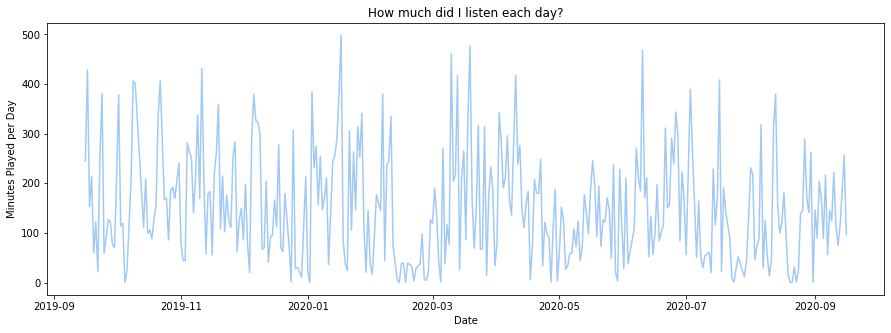

In [17]:
time_per_day = (
    stream.groupby("Date").sum().sort_values(by="Minutes Played", ascending=False)
)  # sorting stream data by date and maximum minutes played

busiest_listening_amount = (
    time_per_day.max()
)  # variable displaying how much i  listenend on my max day 

busiest_listening_day = (
    time_per_day.idxmax()
)  # variable displaying what day that was on

busiest_listening_amount = round(
    busiest_listening_amount[0]
)  # Previous variable is a series for some reason, this line just grabs the number we're interested in

busiest_listening_day = str(busiest_listening_day[0])[
    0:10
]  # have to turn the above variable into a string to slice just the date and not the 00:00 time

average_listen_per_day = round(time_per_day.mean())

average_listen_per_day = int(
    float((str(average_listen_per_day)[18:23]))
)  # pretty messy way to get the values we need

fig, ax = plt.subplots(figsize=(15,5))
sns.set_palette("pastel")
sns.lineplot(data=time_per_day["Minutes Played"])
plt.xlabel("Date")
plt.ylabel("Minutes Played per Day")
plt.title("How much did I listen each day?")

print(
    f"Your busiest listened day was {busiest_listening_day} where you listened to {busiest_listening_amount} minutes! That's equal to {busiest_listening_amount/60} hours!"
)
print(
    f"On average you listen to {average_listen_per_day} minutes, or around {round((average_listen_per_day/60),1)} hours per day"
)

Looks like there was a bit of a lull around February 2020. This was probably because I had just moved and started a new job and wasn't listening in the office as much. 

Let's check if I have a particular day I like to listen on

             Minutes Played
Day of Week                
Monday          7961.538133
Tuesday         8469.989167
Wednesday       8005.919667
Thursday        8273.370883
Friday          7506.034733
Saturday        6279.155783
Sunday          7130.080600


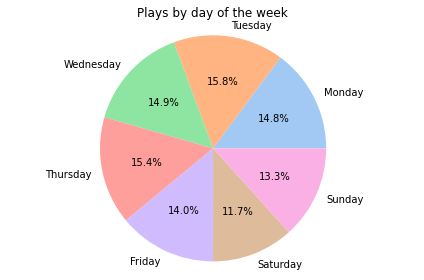

In [18]:
stream["Day of Week"] = stream["Date"].dt.day_name() #TODO WHY doesn't this display in day of the week order 🤬
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_plays = (
    stream.groupby("Day of Week")
    .sum()
    .sort_values(by="Minutes Played", ascending=False)
    .reindex(day_order)
)

print(day_of_week_plays)

fig1, ax1 = plt.subplots()
ax1.pie(
    day_of_week_plays["Minutes Played"],
    labels=day_of_week_plays.index,
    autopct="%1.1f%%",
)
ax1.axis("equal")
plt.title("Plays by day of the week")
plt.tight_layout()


Pretty even spread throughout the working week. Saturday and Sundays are less because I'm usually out doing other things than listening to music. 
Let's check monthly habits:

           Minutes Played
Month                    
January       5881.543000
November      5485.973200
March         5475.377433
October       5310.783100
June          5069.284500
April         5056.058217
September     4729.267717
December      4103.863567
August        3710.441433
May           3563.669950
July          2823.331833
February      2416.495017


Text(0, 0.5, 'Month')

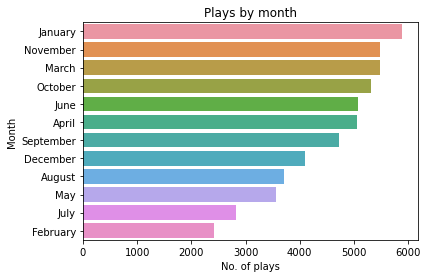

In [19]:
#%% plays by month

stream["Month"] = stream["endTime"].dt.month_name()
monthly_plays = (
    stream.groupby("Month").sum().sort_values(by="Minutes Played", ascending=False)
)
print(monthly_plays)

sns.barplot(x=monthly_plays["Minutes Played"], y=monthly_plays.index)
plt.title("Plays by month")
plt.xlabel("No. of plays")
plt.ylabel("Month")


So January is my most played month. This might be because Spotify releases lots of curated playlists in the new year to try and broaden your listening. 

Let's check my top 5 played artists by play count and then by total minutes played

artistName
Tame Impala                1060
The Beatles                 509
Pink Floyd                  400
Taylor Swift                375
Wolfgang Amadeus Mozart     316
Name: Play Count, dtype: int64


Text(0.5, 1.0, 'Most played artists - by play count')

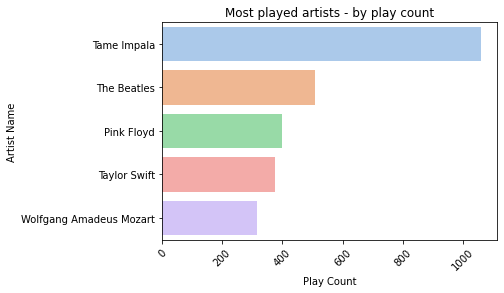

In [20]:
#%% Most played artists by play count
most_played_artist_plays = (
    stream.groupby("artistName").count().sort_values(by="trackName", ascending=False)
)
most_played_artist_plays["Play Count"] = most_played_artist_plays["trackName"]
print(most_played_artist_plays["Play Count"][0:5])
fig2, ax2 = plt.subplots()

sns.barplot(
    x=most_played_artist_plays["trackName"][0:5], y=most_played_artist_plays.index[0:5]
)
# most_played_artist_plays["trackName"][0:5].plot(ax = ax2, kind = "barh")
plt.xticks(rotation=45)
plt.xlabel("Play Count")
plt.ylabel("Artist Name")
plt.title("Most played artists - by play count")

                         Minutes Played
artistName                             
Tame Impala                 2298.766983
Stuff You Should Know       1973.141433
Pink Floyd                  1131.311017
Wolfgang Amadeus Mozart     1016.584050
Taylor Swift                 762.707400


Text(0.5, 1.0, 'Most played artists - by minutes played')

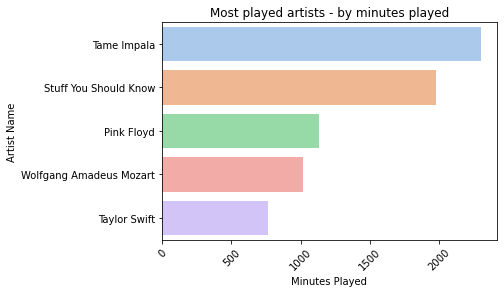

In [21]:
#%% Most played artists by total play time
most_played_artist_minutes = (
    stream.groupby("artistName").sum().sort_values(by="Minutes Played", ascending=False)
)

print(most_played_artist_minutes.head())

fig, ax3 = plt.subplots()
sns.barplot(
    x=most_played_artist_minutes["Minutes Played"][0:5],
    y=most_played_artist_minutes.index[0:5],
)
plt.xticks(rotation=45)
plt.xlabel("Minutes Played")
plt.ylabel("Artist Name")
plt.title("Most played artists - by minutes played")


Stuff you should know is a podacast that averages hour long episodes - which explains why it occurs in the top listen by minutes but not by plays - not enough to beat Tame Impala though. 
Taylor Swift is a bit of a surpirse, but I do love her latest album, I would guess >95% of her plays are from "Folklore". 

Let's create a function that spits out the top songs (by play count) for a given artist

In [50]:
def top_songs(artist):
    artist_df = stream[(stream["artistName"].str.contains(artist))]
    top_songs_by_artist = (
        artist_df.groupby("trackName")
        .count()
        .sort_values(by="artistName", ascending=False)
    )
    print(f"Your top songs by {artist} are: \n {top_songs_by_artist['Minutes Played'].head()}")

    fig4, ax4 = plt.subplots()
    sns.barplot(
        x=top_songs_by_artist["artistName"][0:9], y=top_songs_by_artist.index[0:9]
    )
    plt.ylabel("Track Name")
    plt.xlabel("Song play count")
    plt.title(f"Most played songs by {artist}")

Now I wonder if my Taylor Swift/Folklore prediction was correct...

Your top songs by Taylor Swift are: 
 trackName
cardigan                           18
the last great american dynasty    16
seven                              16
the 1                              14
betty                              14
Name: Minutes Played, dtype: int64


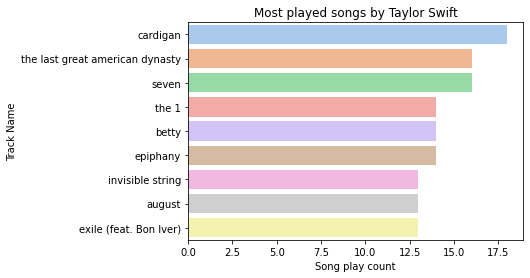

In [51]:
top_songs("Taylor Swift")

Looks like it was accurate! And each song in the album is played roughly the same amount of time, which seems right as I usually just play the album through each time. 
I wonder how much of her non-Folklore stuff I've listened to..
There are 16 tracks on the album, so lets look at my top 20

Text(0.5, 0, 'Song play count')

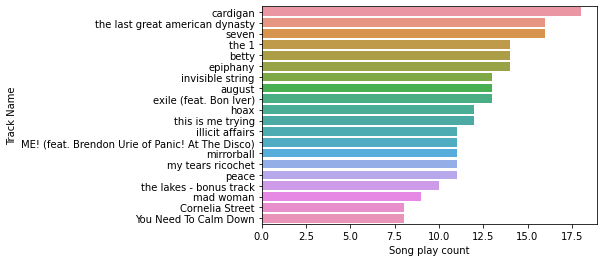

In [68]:
taylor_swift_top_songs = stream[(stream["artistName"].str.contains("Taylor Swift"))]
top_songs_by_taylor = (taylor_swift_top_songs .groupby("trackName").count().sort_values(by="artistName", ascending=False))
sns.barplot(x=top_songs_by_taylor["artistName"][0:20], y=top_songs_by_artist.index[0:20])
plt.ylabel("Track Name")
plt.xlabel("Song play count")


Not as much of a difference as I would have thought, although it looks like 17/20 of my top Taylor songs are Folklore. 

Let's see what my top played songs are

In [52]:
top_played_songs = (
    stream.groupby("trackName").count().sort_values(by="artistName", ascending=False)
)
top_played_songs_list = top_played_songs.index[0:5].tolist()


def artist_from_song(song):
    artist = (stream[(stream["trackName"]).str.contains(song)]["artistName"]).iloc[0]
    # print(artist)
    return artist


artist_from_song_list = []
for song in top_played_songs_list:
    new_artist = artist_from_song(song)
    artist_from_song_list.append(new_artist)

top_songs = pd.DataFrame(top_played_songs_list, artist_from_song_list)
top_songs.columns = ["Song Name"]

print(f"Your top songs were: \n {top_songs}")

Your top songs were: 
                              Song Name
Tame Impala                 Borderline
Scott McKenzie           San Francisco
Three Dog Night    Never Been To Spain
Tame Impala             Breathe Deeper
Bob Seger        Ramblin' Gamblin' Man


So Tame Impala made it into the top 5 twice! The other songs are James- specific one hit wonders however. 

I would like to see to which artists I listen to a variety of songs, vs just a couple of the same songs over and over. To do this I'm going to count the number of songs I've listened to by a particular artist at least 5 times. 

In [71]:
def unique_songs_by_artist(artist2): #TODO This function is looped over in the next cell. The print function makes it very messy. 
    filter_artist = stream[
        (stream["artistName"].str.contains(artist2))
    ]  # filter by the selected artist
    song_count = (
        filter_artist.groupby("trackName")
        .count()
        .sort_values(by="Date", ascending=False)
    )  # group by that srtists songs
    song_variety = song_count.where(
        song_count["Date"] >= 5
    ).dropna()  # only keep tracks that ive played >= 5 times
    song_variety_count = len(song_variety)  # length of previous series
    print(f"You've listened to {song_variety_count} unique songs by {artist2} at least 5 times!") 
    return song_variety_count

In [74]:
unique_songs_by_artist("Tame Impala")
unique_songs_by_artist("Bob Seger")
unique_songs_by_artist("The Beatles")

You've listened to 72 unique songs by Tame Impala at least 5 times!
You've listened to 2 unique songs by Bob Seger at least 5 times!
You've listened to 29 unique songs by The Beatles at least 5 times!


29

So which of my Top artists do I also listen to a variety of songs from?

You've listened to 72 unique songs by Tame Impala at least 5 times!
You've listened to 29 unique songs by The Beatles at least 5 times!
You've listened to 22 unique songs by Pink Floyd at least 5 times!
You've listened to 27 unique songs by Taylor Swift at least 5 times!
You've listened to 13 unique songs by Wolfgang Amadeus Mozart at least 5 times!
                         No. of Unique Songs Played At Least 5 Times
Tame Impala                                                       72
The Beatles                                                       29
Pink Floyd                                                        22
Taylor Swift                                                      27
Wolfgang Amadeus Mozart                                           13


Text(0.5, 1.0, 'No. of Unique Songs Played At Least 5 Times')

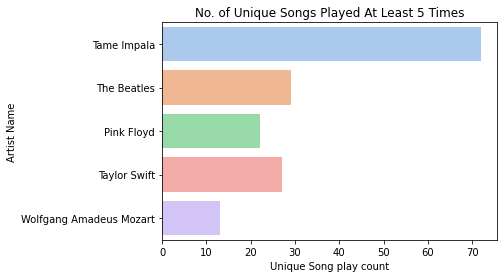

In [76]:
#%% Which of my top artists do I listen to a variety of songs from?
# most_artist_plays is variable from earlier that contains my top played artists by play count

most_played_artist_plays_list = most_played_artist_plays[0:5].index.tolist()

unique_songs_by_top_artist_list = []
for artists in most_played_artist_plays_list:
    unique_songs_by_that_artist = unique_songs_by_artist(artists)
    unique_songs_by_top_artist_list.append(unique_songs_by_that_artist)

unique_songs_df = pd.DataFrame(
    unique_songs_by_top_artist_list, most_played_artist_plays_list
)
unique_songs_df.columns = ["No. of Unique Songs Played At Least 5 Times"]
print(unique_songs_df)

fig5, ax5 = plt.subplots()
sns.barplot(
    x=unique_songs_df["No. of Unique Songs Played At Least 5 Times"],
    y=unique_songs_df.index,
)
plt.ylabel("Artist Name")
plt.xlabel("Unique Song play count")
plt.title("No. of Unique Songs Played At Least 5 Times")

That's all for now. I would like to revisit this project later and look into my playlist creation, and perhaps use the Spotify devlopers API to look at the components that make up the songs I like (danceability, energy etc). 